In [15]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, roc_curve, roc_auc_score
from datetime import datetime

In [16]:
# reading a data set

df = pd.read_excel("Lab Session Data.xlsx", sheet_name="marketing_campaign").drop(columns=['ID', 'Dt_Customer'])
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0


In [17]:
# data preprocessing

df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], dtype=int)
df["Age"] = datetime.now().year - df["Year_Birth"]
df = df.drop(columns=['Year_Birth'])

print("Null values")
print(df.isnull().sum())

df = df.fillna(df.mean())
print("null values")
print(df.isnull().sum())


Null values
Income                     24
Kidhome                     0
Teenhome                    0
Recency                     0
MntWines                    0
MntFruits                   0
MntMeatProducts             0
MntFishProducts             0
MntSweetProducts            0
MntGoldProds                0
NumDealsPurchases           0
NumWebPurchases             0
NumCatalogPurchases         0
NumStorePurchases           0
NumWebVisitsMonth           0
AcceptedCmp3                0
AcceptedCmp4                0
AcceptedCmp5                0
AcceptedCmp1                0
AcceptedCmp2                0
Complain                    0
Z_CostContact               0
Z_Revenue                   0
Response                    0
Education_2n Cycle          0
Education_Basic             0
Education_Graduation        0
Education_Master            0
Education_PhD               0
Marital_Status_Absurd       0
Marital_Status_Alone        0
Marital_Status_Divorced     0
Marital_Status_Married      

In [18]:
# determing the target column and choosing classes

target_col = 'Response'
classes = tuple(df[target_col].unique()[0:2])
print(classes)



(np.int64(1), np.int64(0))


In [19]:
# A1

def calculateSpread(data, target_col, classes):
  # classes_data = data.loc[data[target_col] in classes]
  class1_data = np.array(data.loc[data[target_col] == classes[0]].drop(columns=[target_col]))
  class2_data = np.array(data.loc[data[target_col] == classes[1]].drop(columns = [target_col]))

  # calculating mean vector for each class
  class1_mean_vec = np.mean(class1_data, axis=0)
  class2_mean_vec = np.mean(class2_data, axis=0)

  # calculating the spread vector for each class
  class1_spread_vec = np.std(class1_data, axis=0)
  class2_spread_vec = np.std(class2_data, axis=0)

  # calculating interclass spread
  interclass_spread = np.linalg.norm(class1_mean_vec - class2_mean_vec)

  # displaying results
  print('Interclass Spread: ', interclass_spread)
  print('Class 1 Spread: ', class1_spread_vec)
  print('Class 2 Spread: ', class2_spread_vec)


calculateSpread(df, target_col, classes)


Interclass Spread:  9333.909036301533
Class 1 Spread:  [2.31286250e+04 4.86616758e-01 4.92002810e-01 2.76180615e+01
 4.26543810e+02 4.60304558e+01 2.86460238e+02 6.17632173e+01
 4.62584978e+01 5.74213477e+01 2.10676350e+00 2.55495026e+00
 3.12712476e+00 3.07731420e+00 2.56604119e+00 4.21177786e-01
 3.88806780e-01 4.46740298e-01 4.24949350e-01 2.37264823e-01
 9.43470135e-02 0.00000000e+00 0.00000000e+00 2.48051679e-01
 7.71502918e-02 4.97978991e-01 3.76210442e-01 4.59295490e-01
 5.46355916e-02 5.46355916e-02 3.50798048e-01 4.55326128e-01
 4.65450916e-01 3.83887914e-01 2.31625095e-01 5.46355916e-02
 1.23796183e+01]
Class 2 Spread:  [2.50937828e+04 5.44831755e-01 5.45527269e-01 2.85116100e+01
 3.05079126e+02 3.81817429e+01 2.05246072e+02 5.28563817e+01
 3.99905724e+01 5.05627622e+01 1.89948287e+00 2.77951508e+00
 2.79898756e+00 3.27666107e+00 2.40071843e+00 2.07568775e-01
 2.28154274e-01 1.89375727e-01 1.81493333e-01 7.22430828e-02
 9.67195687e-02 0.00000000e+00 0.00000000e+00 2.93164204e

Histogram data [ 10  18  33  59  69 112  84  92 129 172 222 164 122  94 116 125 100  96
 104  85 124  51  32  15   7   2   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   1   1   0   1]
Mean of Histogram Data 47.659574468085104
Variance of Histogram Data 3463.9692168401984


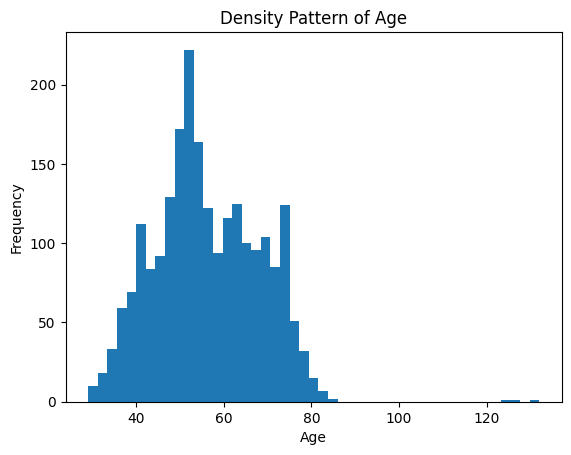

In [20]:
# A2
def densityPattern(data, feature, bins = 3):
  hist_data, bin_edges = np.histogram(data[feature], bins = bins)
  print("Histogram data" , hist_data)
  print("Mean of Histogram Data", np.mean(hist_data))
  print("Variance of Histogram Data", np.std(hist_data) ** 2)

  plt.hist(data[feature], bins = bins)
  plt.title('Density Pattern of ' + feature)
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.show()



densityPattern(df, 'Age',int((df.shape[0]) ** 0.5))

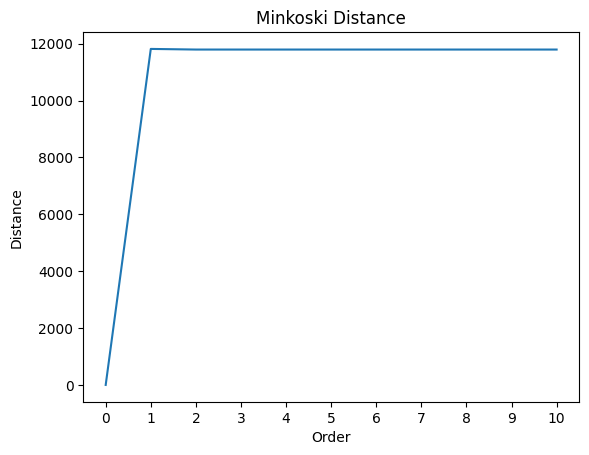

In [21]:
# A3

def calculateMinkoskiDist(feature_vec1, feature_vec2):
  r = np.arange(11)
  dist = [np.linalg.norm(feature_vec1 - feature_vec2, ord=i) for i in r]
  r = [str(i) for i in r]
  plt.plot( r ,  dist)
  plt.title('Minkoski Distance')
  plt.xlabel('Order')
  plt.ylabel('Distance')
  plt.show()

calculateMinkoskiDist(df.iloc[0, :4], df.iloc[1, :4])

In [22]:
# A4

# feature vectors for 2 chosen classes
X = df.loc[df[target_col].isin(classes)].drop(columns=[target_col])

# target variable for 2 chosen classes with label encoding
y = df[target_col].loc[df[target_col].isin(classes)].map({classes[0]: 0 , classes[1]: 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
# A5

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [24]:
# A6

print("Model Accuracy:", neigh.score(X_test, y_test))

Model Accuracy: 0.8303571428571429


In [25]:
 # A7

 prediction = neigh.predict(X_test)
 print("Test vector", prediction)

Test vector [1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 

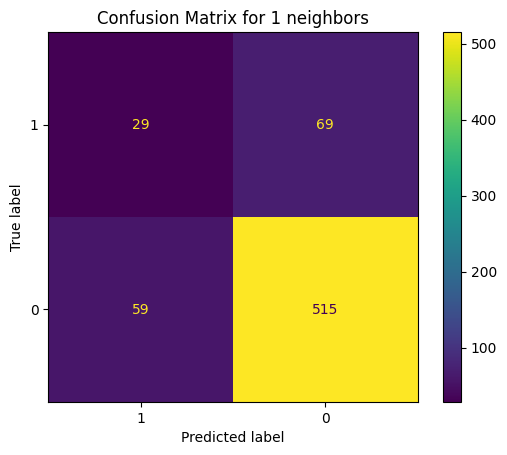

              precision    recall  f1-score   support

           0       0.33      0.30      0.31        98
           1       0.88      0.90      0.89       574

    accuracy                           0.81       672
   macro avg       0.61      0.60      0.60       672
weighted avg       0.80      0.81      0.81       672



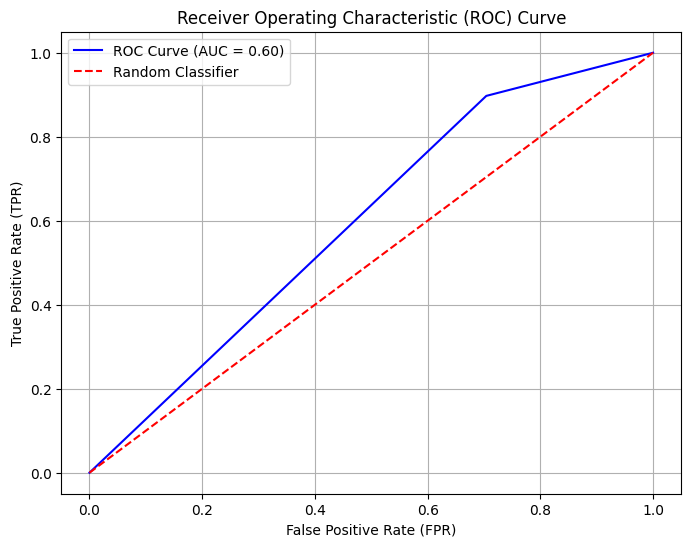

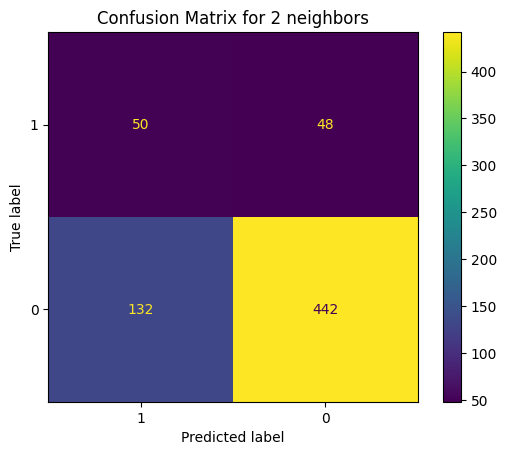

              precision    recall  f1-score   support

           0       0.27      0.51      0.36        98
           1       0.90      0.77      0.83       574

    accuracy                           0.73       672
   macro avg       0.59      0.64      0.59       672
weighted avg       0.81      0.73      0.76       672



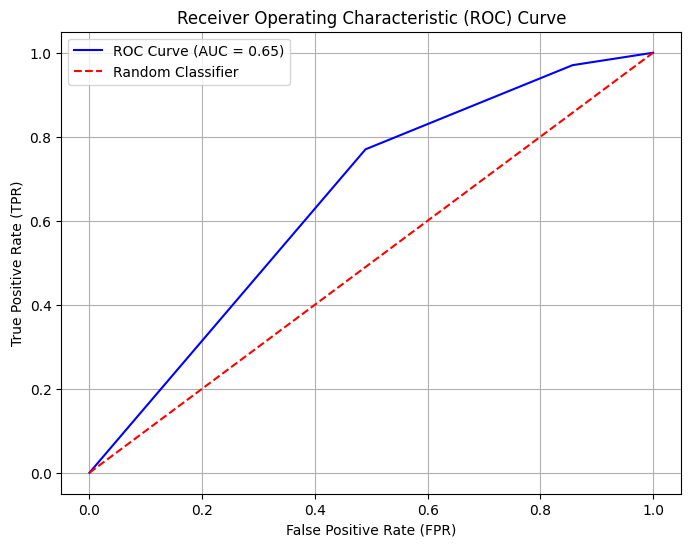

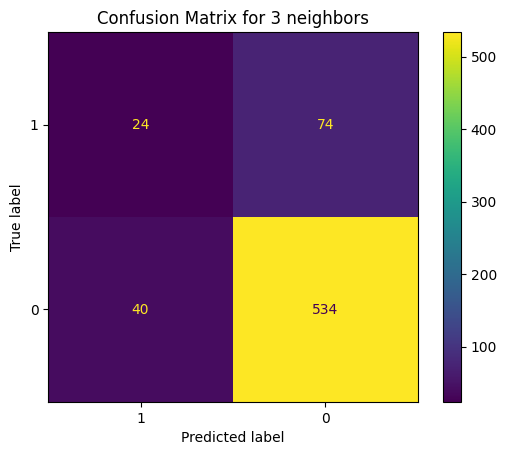

              precision    recall  f1-score   support

           0       0.38      0.24      0.30        98
           1       0.88      0.93      0.90       574

    accuracy                           0.83       672
   macro avg       0.63      0.59      0.60       672
weighted avg       0.80      0.83      0.81       672



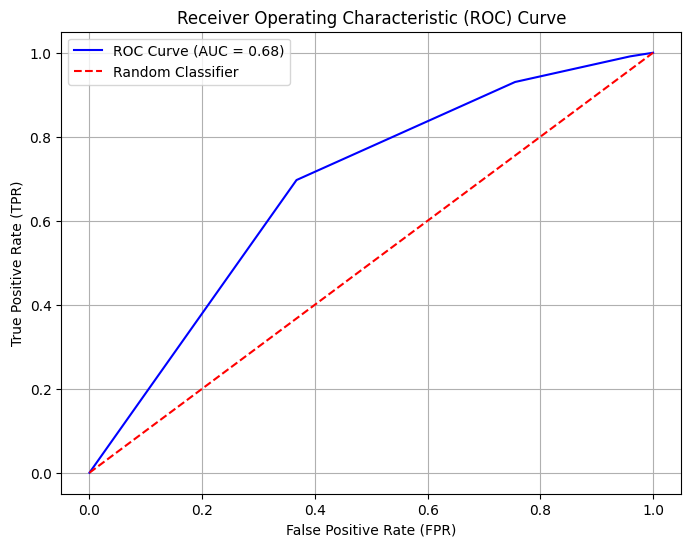

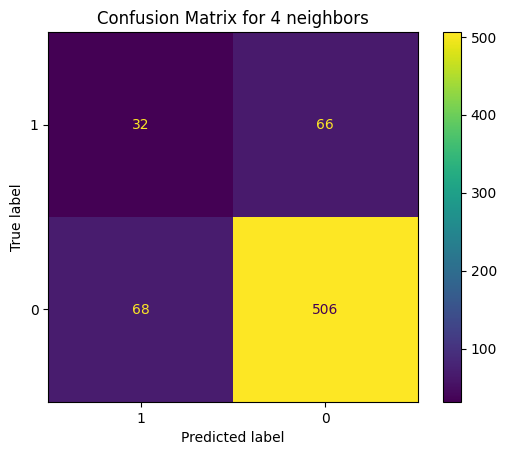

              precision    recall  f1-score   support

           0       0.32      0.33      0.32        98
           1       0.88      0.88      0.88       574

    accuracy                           0.80       672
   macro avg       0.60      0.60      0.60       672
weighted avg       0.80      0.80      0.80       672



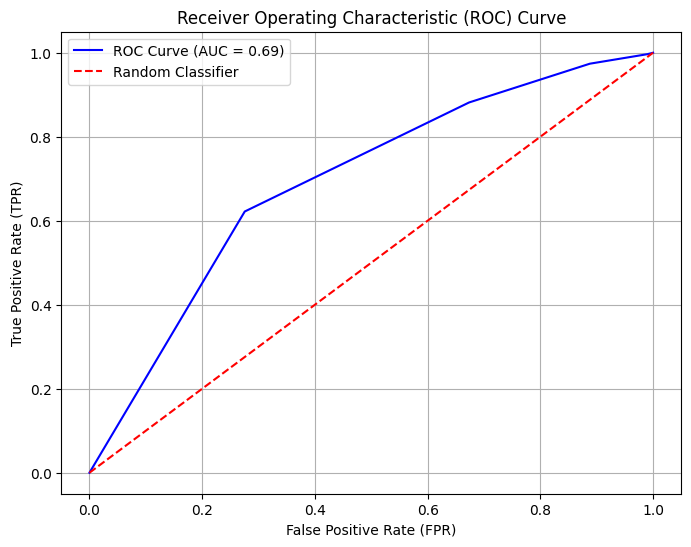

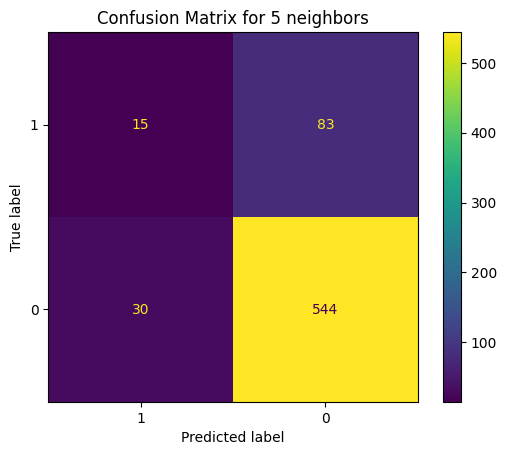

              precision    recall  f1-score   support

           0       0.33      0.15      0.21        98
           1       0.87      0.95      0.91       574

    accuracy                           0.83       672
   macro avg       0.60      0.55      0.56       672
weighted avg       0.79      0.83      0.80       672



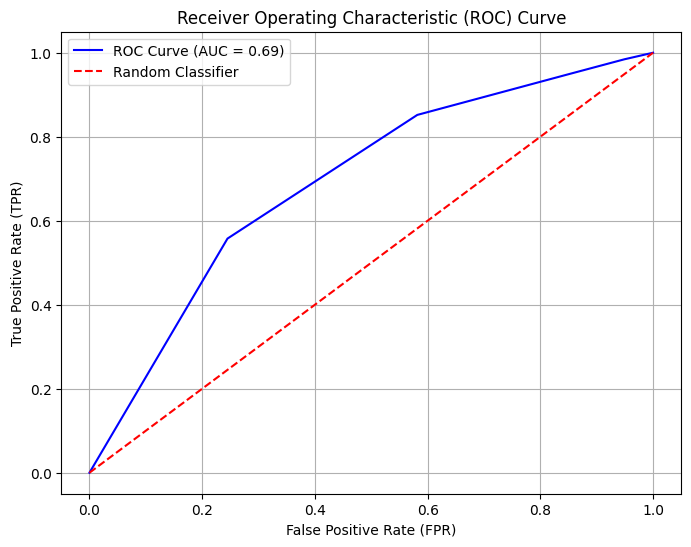

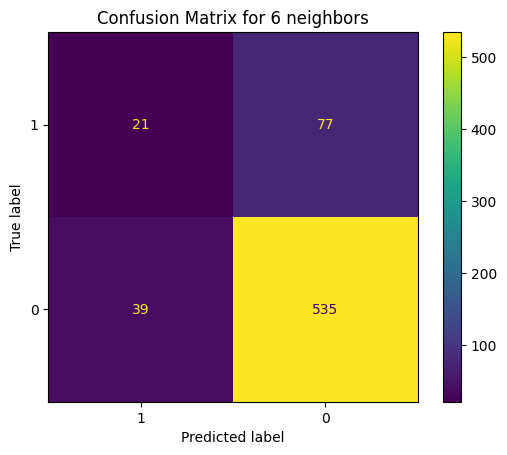

              precision    recall  f1-score   support

           0       0.35      0.21      0.27        98
           1       0.87      0.93      0.90       574

    accuracy                           0.83       672
   macro avg       0.61      0.57      0.58       672
weighted avg       0.80      0.83      0.81       672



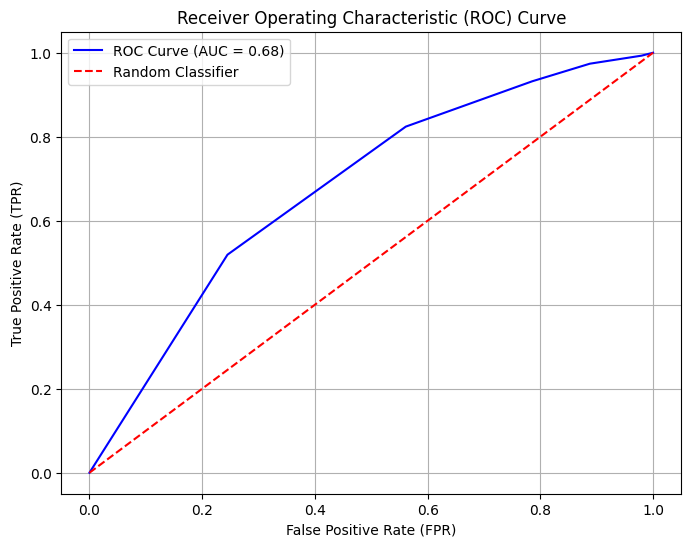

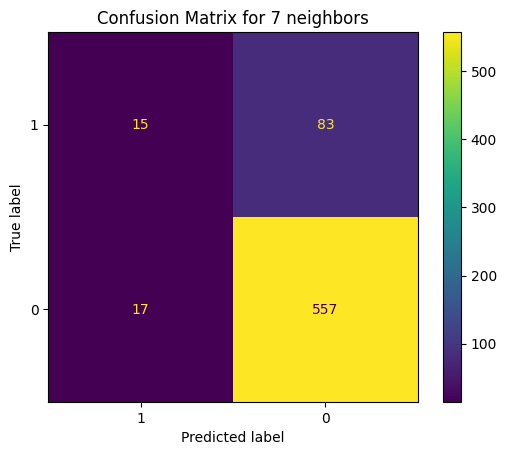

              precision    recall  f1-score   support

           0       0.47      0.15      0.23        98
           1       0.87      0.97      0.92       574

    accuracy                           0.85       672
   macro avg       0.67      0.56      0.57       672
weighted avg       0.81      0.85      0.82       672



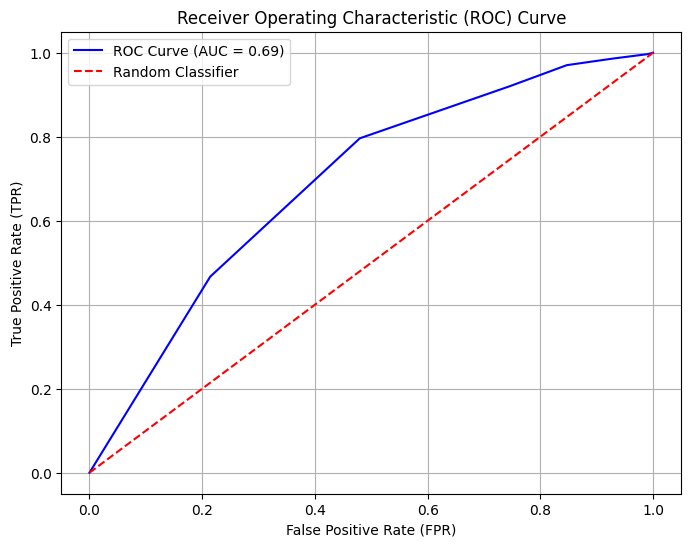

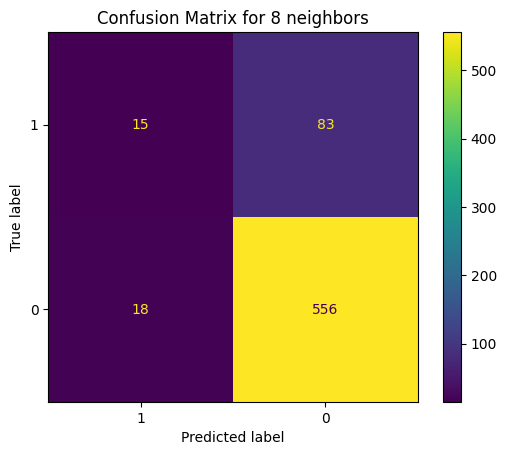

              precision    recall  f1-score   support

           0       0.45      0.15      0.23        98
           1       0.87      0.97      0.92       574

    accuracy                           0.85       672
   macro avg       0.66      0.56      0.57       672
weighted avg       0.81      0.85      0.82       672



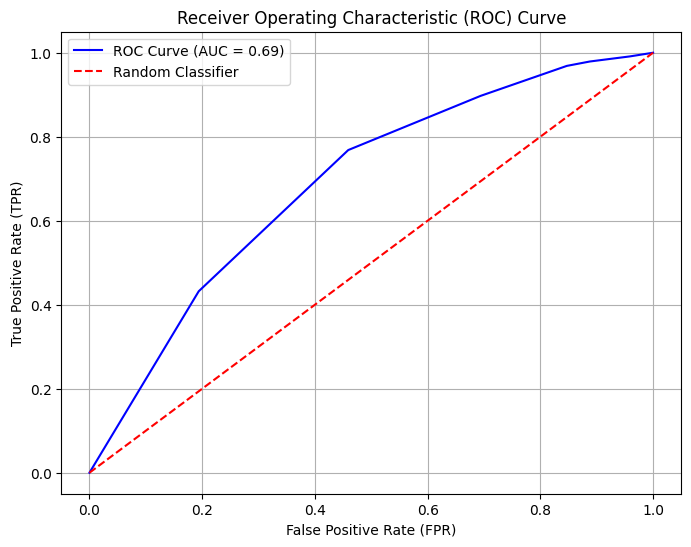

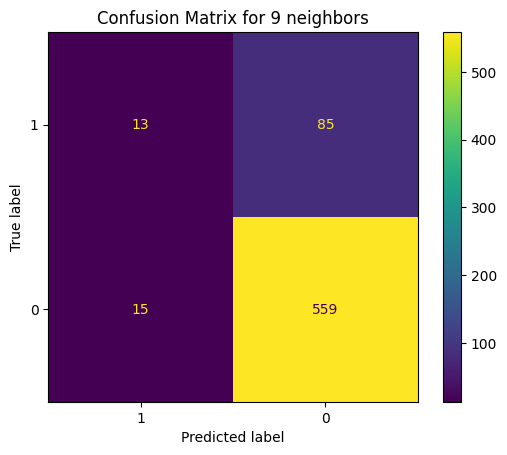

              precision    recall  f1-score   support

           0       0.46      0.13      0.21        98
           1       0.87      0.97      0.92       574

    accuracy                           0.85       672
   macro avg       0.67      0.55      0.56       672
weighted avg       0.81      0.85      0.81       672



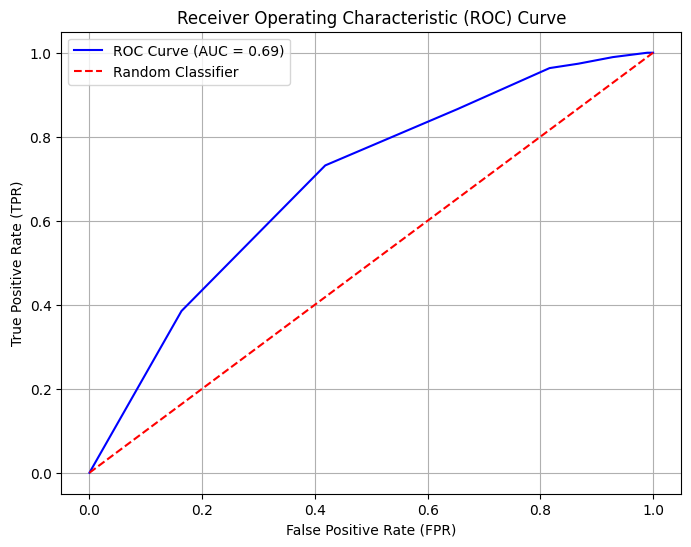

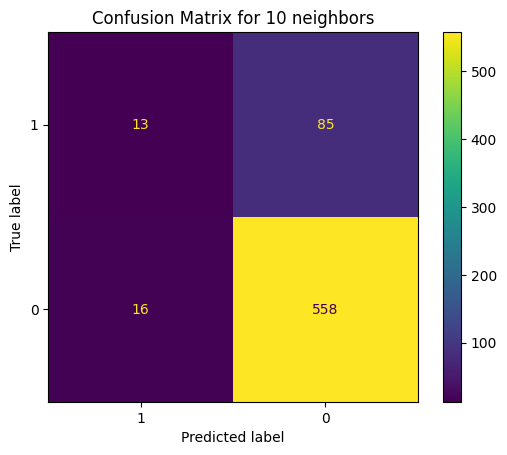

              precision    recall  f1-score   support

           0       0.45      0.13      0.20        98
           1       0.87      0.97      0.92       574

    accuracy                           0.85       672
   macro avg       0.66      0.55      0.56       672
weighted avg       0.81      0.85      0.81       672



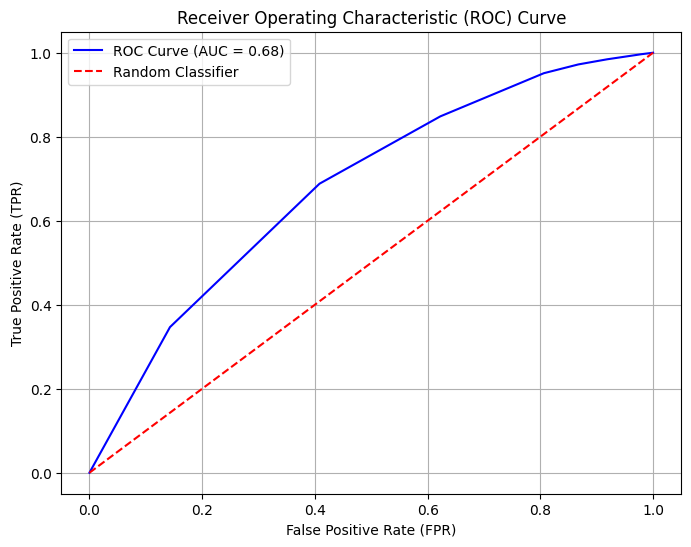

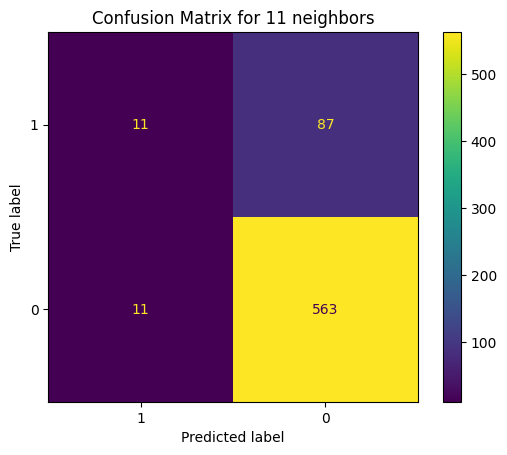

              precision    recall  f1-score   support

           0       0.50      0.11      0.18        98
           1       0.87      0.98      0.92       574

    accuracy                           0.85       672
   macro avg       0.68      0.55      0.55       672
weighted avg       0.81      0.85      0.81       672



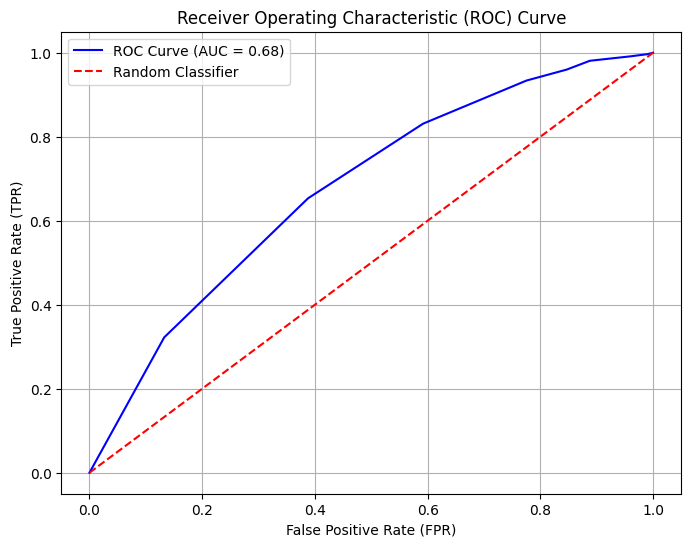

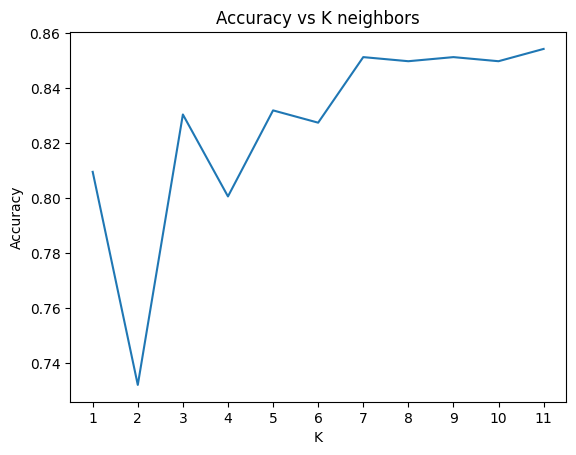

In [26]:
# A8 , A9 and O3

def KNN(X_train, X_test, y_train, y_test, k, metric='minkowski'):
  neigh = KNeighborsClassifier(n_neighbors=k, metric= metric)
  neigh.fit(X_train, y_train)
  accuracy_score = neigh.score(X_test, y_test)
  # print(f"Model Accuracy for {k} neighbors:", accuracy_score)
  prediction = neigh.predict(X_test)

  # generating confusion matrix and preformance report
  cm = confusion_matrix(y_test, prediction)
  ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= classes).plot()
  plt.title(f'Confusion Matrix for {k} neighbors')
  plt.show()

  print(classification_report(y_test, prediction))

  # AUROC curve

  # 3. Get predicted probabilities for the positive class
  y_probs = neigh.predict_proba(X_test)[:, 1]

  # 4. Calculate FPR, TPR, and thresholds
  fpr, tpr, thresholds = roc_curve(y_test, y_probs)

  # 5. Plot the ROC curve
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_probs):.2f})')
  plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend()
  plt.grid(True)
  plt.show()

  return accuracy_score

k = np.arange(1,12)
accuracy_scores = np.array([KNN(X_train, X_test, y_train, y_test, i) for i in k])
k = [str(i) for i in k]

plt.plot(k, accuracy_scores)
plt.title('Accuracy vs K neighbors')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

##Optional Section


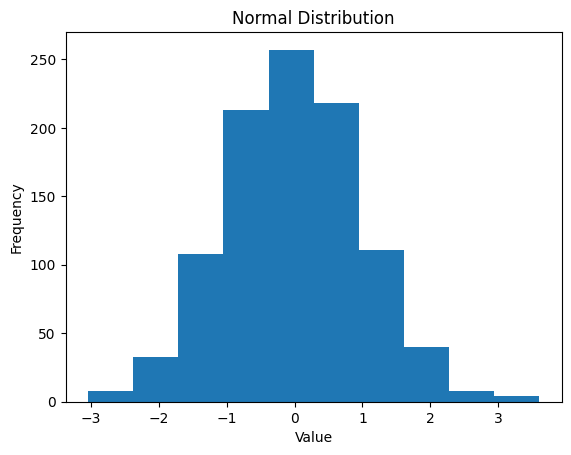

In [27]:
# O1

normal_dist = np.random.normal(size=1000)

plt.hist(normal_dist, bins=10)
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

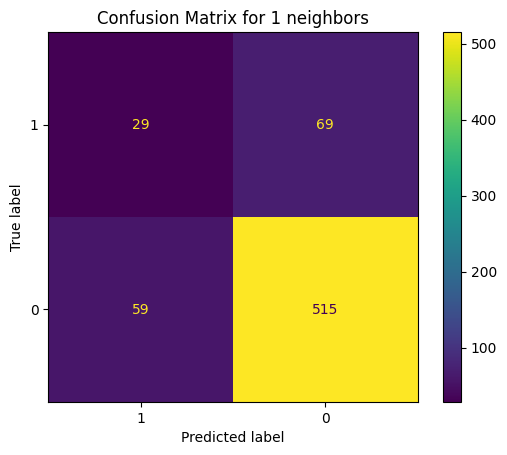

              precision    recall  f1-score   support

           0       0.33      0.30      0.31        98
           1       0.88      0.90      0.89       574

    accuracy                           0.81       672
   macro avg       0.61      0.60      0.60       672
weighted avg       0.80      0.81      0.81       672



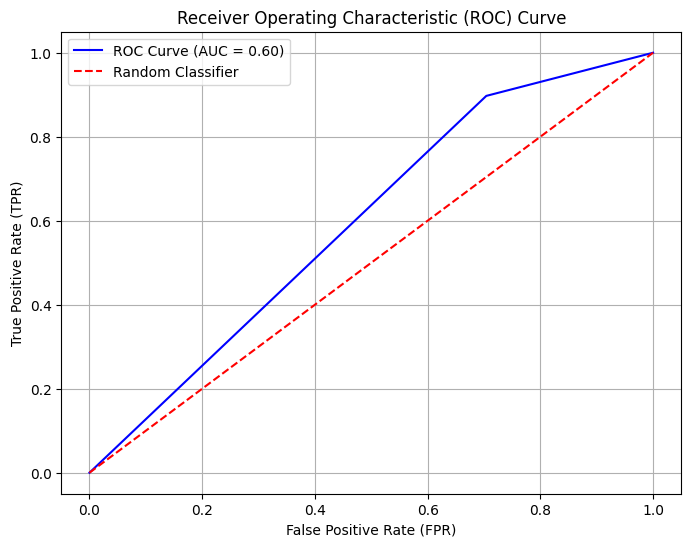

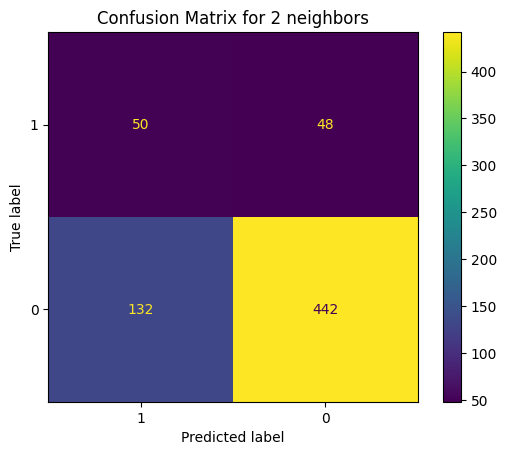

              precision    recall  f1-score   support

           0       0.27      0.51      0.36        98
           1       0.90      0.77      0.83       574

    accuracy                           0.73       672
   macro avg       0.59      0.64      0.59       672
weighted avg       0.81      0.73      0.76       672



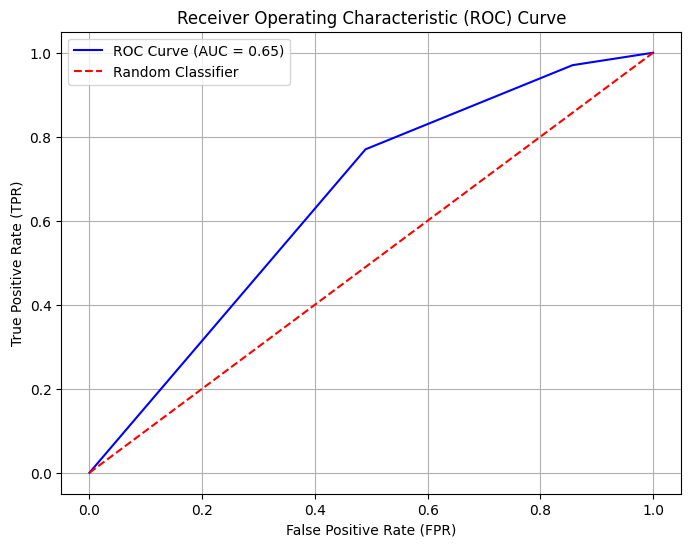

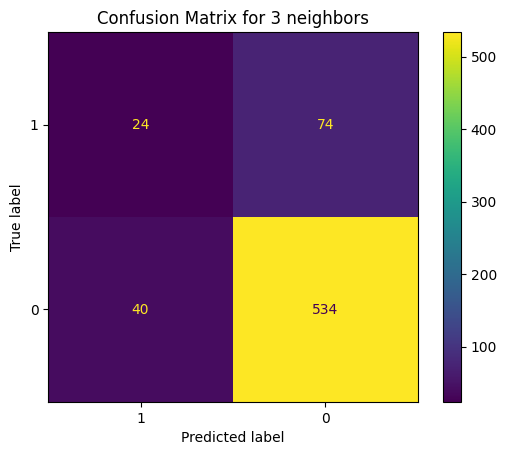

              precision    recall  f1-score   support

           0       0.38      0.24      0.30        98
           1       0.88      0.93      0.90       574

    accuracy                           0.83       672
   macro avg       0.63      0.59      0.60       672
weighted avg       0.80      0.83      0.81       672



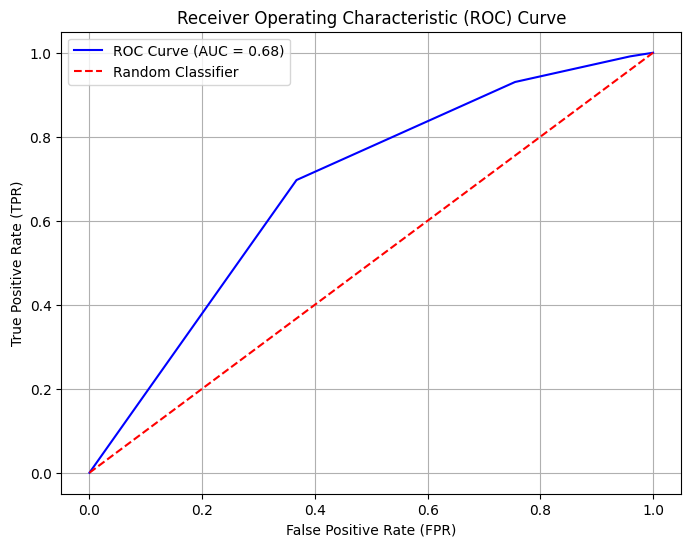

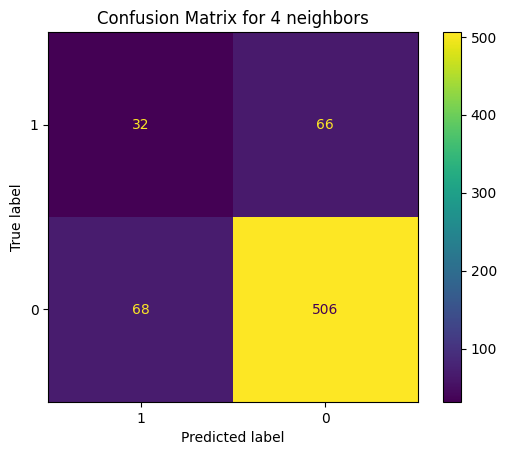

              precision    recall  f1-score   support

           0       0.32      0.33      0.32        98
           1       0.88      0.88      0.88       574

    accuracy                           0.80       672
   macro avg       0.60      0.60      0.60       672
weighted avg       0.80      0.80      0.80       672



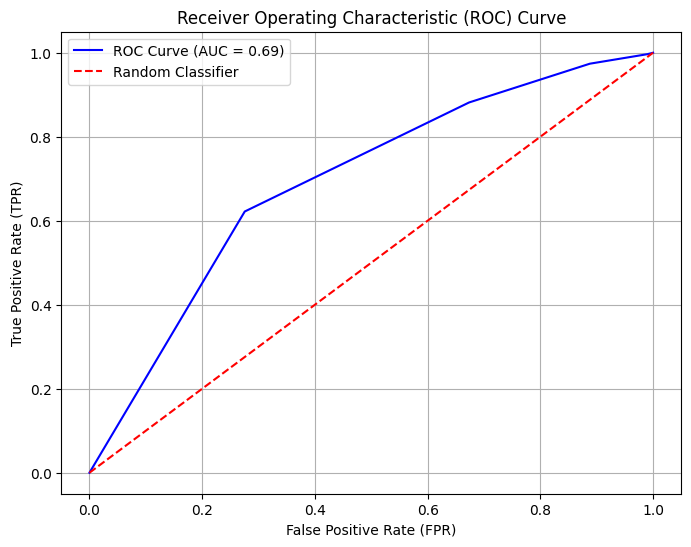

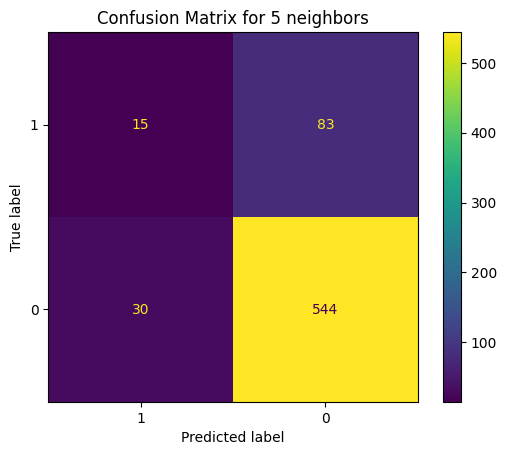

              precision    recall  f1-score   support

           0       0.33      0.15      0.21        98
           1       0.87      0.95      0.91       574

    accuracy                           0.83       672
   macro avg       0.60      0.55      0.56       672
weighted avg       0.79      0.83      0.80       672



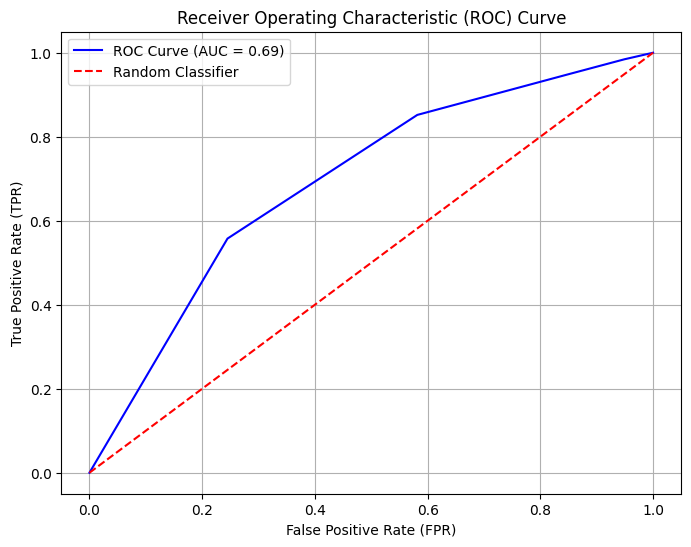

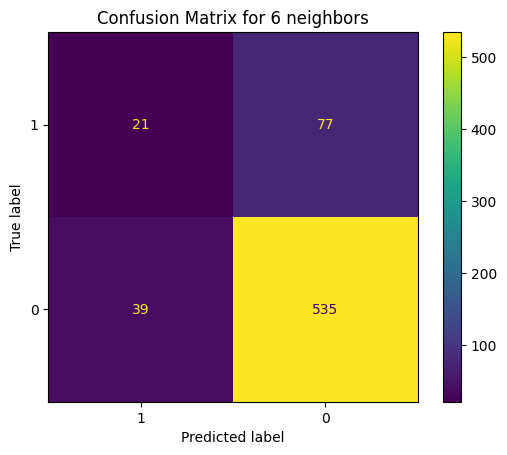

              precision    recall  f1-score   support

           0       0.35      0.21      0.27        98
           1       0.87      0.93      0.90       574

    accuracy                           0.83       672
   macro avg       0.61      0.57      0.58       672
weighted avg       0.80      0.83      0.81       672



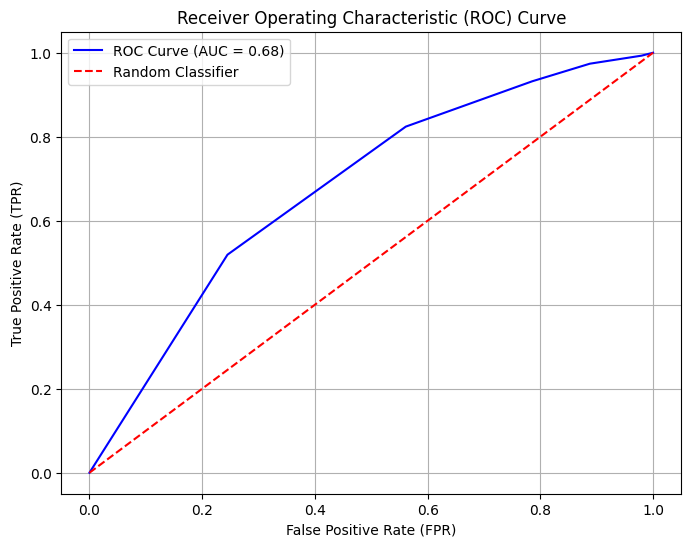

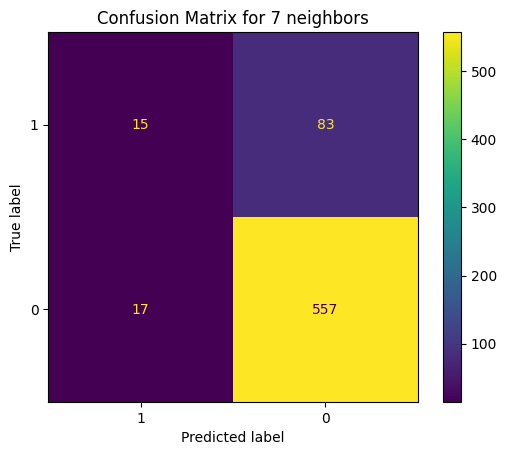

              precision    recall  f1-score   support

           0       0.47      0.15      0.23        98
           1       0.87      0.97      0.92       574

    accuracy                           0.85       672
   macro avg       0.67      0.56      0.57       672
weighted avg       0.81      0.85      0.82       672



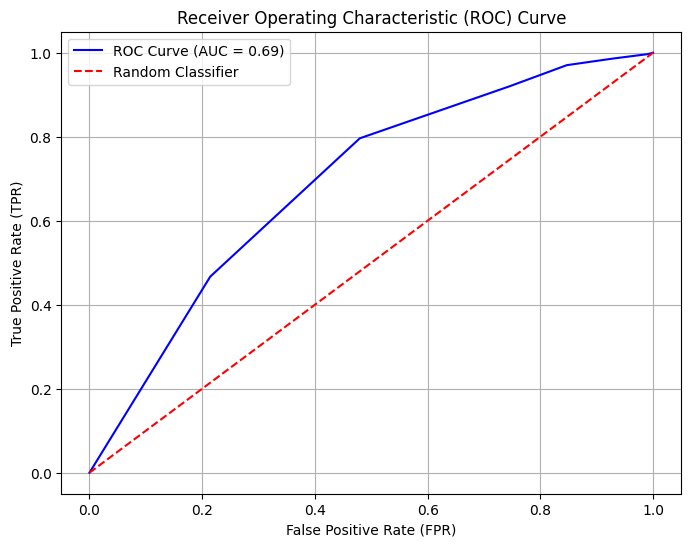

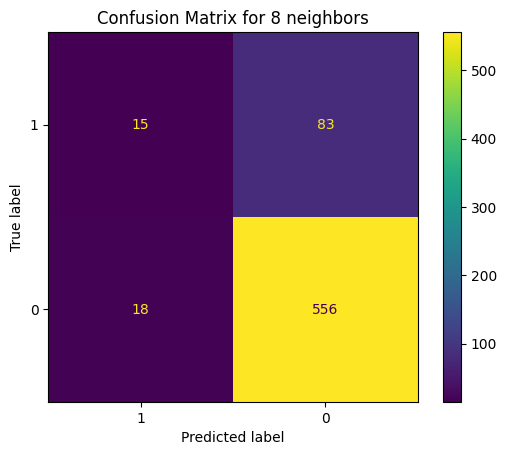

              precision    recall  f1-score   support

           0       0.45      0.15      0.23        98
           1       0.87      0.97      0.92       574

    accuracy                           0.85       672
   macro avg       0.66      0.56      0.57       672
weighted avg       0.81      0.85      0.82       672



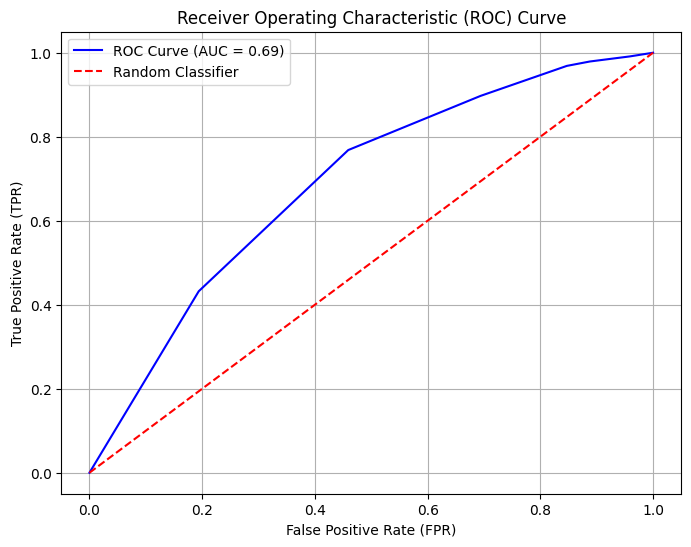

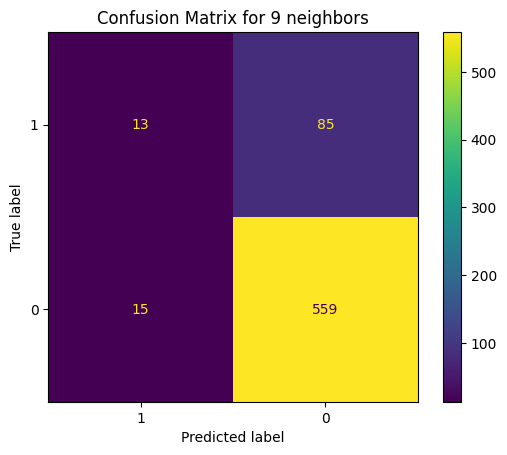

              precision    recall  f1-score   support

           0       0.46      0.13      0.21        98
           1       0.87      0.97      0.92       574

    accuracy                           0.85       672
   macro avg       0.67      0.55      0.56       672
weighted avg       0.81      0.85      0.81       672



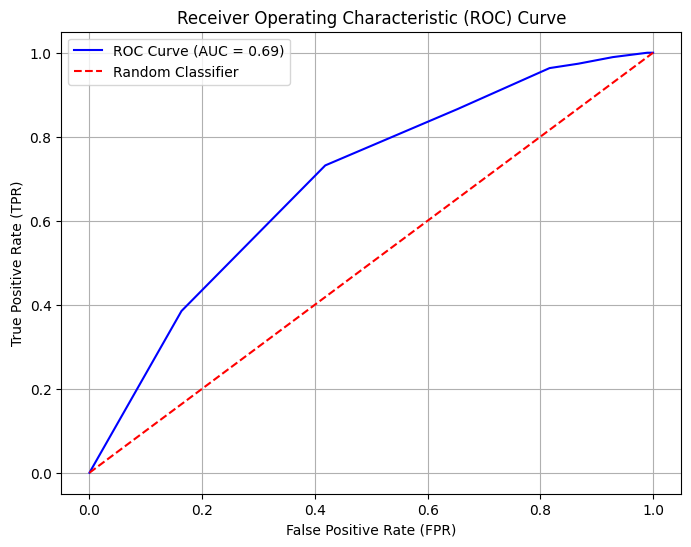

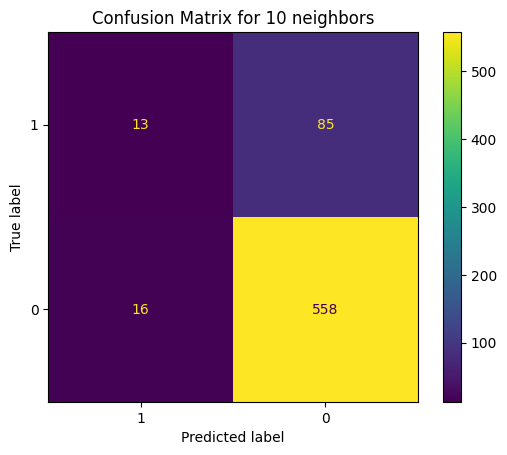

              precision    recall  f1-score   support

           0       0.45      0.13      0.20        98
           1       0.87      0.97      0.92       574

    accuracy                           0.85       672
   macro avg       0.66      0.55      0.56       672
weighted avg       0.81      0.85      0.81       672



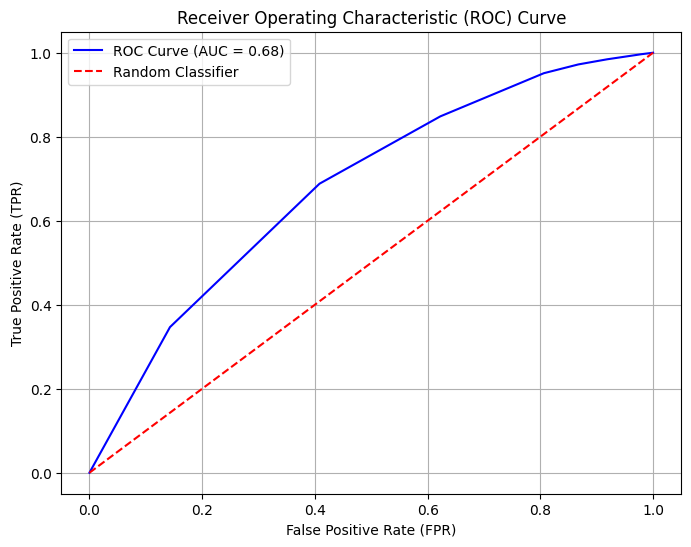

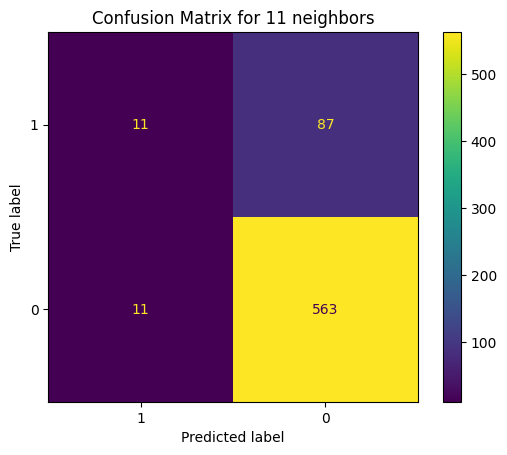

              precision    recall  f1-score   support

           0       0.50      0.11      0.18        98
           1       0.87      0.98      0.92       574

    accuracy                           0.85       672
   macro avg       0.68      0.55      0.55       672
weighted avg       0.81      0.85      0.81       672



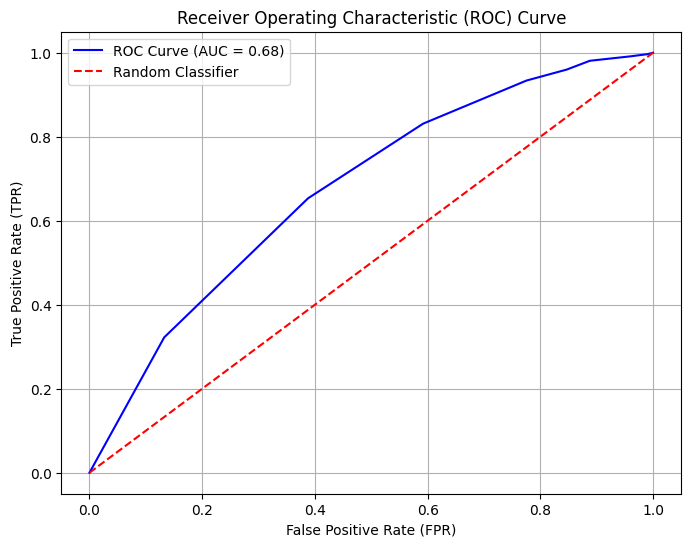

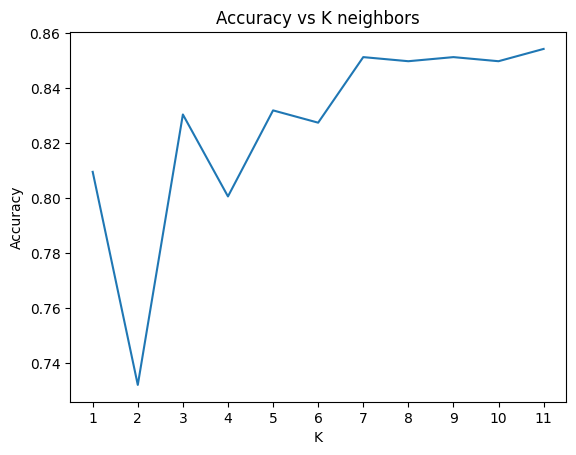

In [28]:
 # O2

k = np.arange(1,12)
accuracy_scores = np.array([KNN(X_train, X_test, y_train, y_test, i, metric = 'euclidean') for i in k])
k = [str(i) for i in k]

plt.plot(k, accuracy_scores)
plt.title('Accuracy vs K neighbors')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()